# Quantum plots (beta)

This notebook provides plotting functionality tailored for the use with the `quantumarticle` documentclass.

### IMPORTANT

In case this notebook does not run smoothly, please open an Issue on our GitHub page https://github.com/quantum-journal/quantum-journal/issues and append the following information:

- The error message (you can include the whole output as .html).
- The version of Jupyter notebook and IPython (as found in the menu under Help > About).
- The version of Matplotlib and the current backend. This information can be found by running the following code:
    ```python
    print(mpl.__version__)
    print(mpl.get_backend())
    ```
    
You will help us tremendously in improving your experience.

Should you have the problem that your figures are not displayed in the Jupyter notebook, you can still save them as PDF documents via `plt.savefig('filename.pdf')`. Afterwards you can use your favorite PDF viewer to check your figures. Nevertheless you should inform us so that the bug can be removed.

## Global routines

The parameters for the plots are set in a way that the font sizes in the resulting graphic match those in the surrounding document.

In [1]:
import numpy             as     np
import matplotlib        as     mpl
import matplotlib.pyplot as     plt
from   matplotlib        import rc
from   cycler            import cycler

_widths = {
    # a4paper columnwidth = 426.79135 pt = 5.93 in
    # letterpaper columnwidth = 443.57848 pt = 6.16 in
    'onecolumn': {
        'a4paper' : 5.93,
        'letterpaper' : 6.16
    },
    # a4paper columnwidth = 231.84843 pt = 3.22 in
    # letterpaper columnwidth = 240.24199 pt = 3.34 in
    'twocolumn': {
        'a4paper' : 3.22,
        'letterpaper' : 3.34
    }
}

_wide_widths = {
    # a4paper wide columnwidth = 426.79135 pt = 5.93 in
    # letterpaper wide columnwidth = 443.57848 pt = 6.16 in
    'onecolumn': {
        'a4paper' : 5.93,
        'letterpaper' : 6.16
    },
    # a4paper wide linewidth = 483.69687 pt = 6.72 in
    # letterpaper wide linewidth = 500.48400 pt = 6.95 in
    'twocolumn': {
        'a4paper' : 6.72,
        'letterpaper' : 6.95
    }
}

_fontsizes = {
    10 : {
        'tiny' : 5,
        'scriptsize' : 7,
        'footnotesize' : 8, 
        'small' : 9, 
        'normalsize' : 10,
        'large' : 12, 
        'Large' : 14, 
        'LARGE' : 17,
        'huge' : 20,
        'Huge' : 25
    },
    11 : {
        'tiny' : 6,
        'scriptsize' : 8,
        'footnotesize' : 9, 
        'small' : 10, 
        'normalsize' : 11,
        'large' : 12, 
        'Large' : 14, 
        'LARGE' : 17,
        'huge' :  20,
        'Huge' :  25
    },
    12 : {
        'tiny' : 6,
        'scriptsize' : 8,
        'footnotesize' : 10, 
        'small' : 11, 
        'normalsize' : 12,
        'large' : 14, 
        'Large' : 17, 
        'LARGE' : 20,
        'huge' :  25,
        'Huge' :  25
    }
}

_width         = 1
_wide_width    = 1
_quantumviolet = '#53257F'
_quantumgray   = '#555555'

# Sets up the plot with the fitting arguments so that the font sizes of the plot
# and the font sizes of the document are well aligned
#
#     columns : string = ('onecolumn' | 'twocolumn')
#         the columns you used to set up your quantumarticle, 
#         defaults to 'twocolumn'
#
#     paper : string = ('a4paper' | 'letterpaper')
#         the paper size you used to set up your quantumarticle,
#         defaults to 'a4paper'
#
#     fontsize : int = (10 | 11 | 12)
#         the fontsize you used to set up your quantumarticle as int
#
#     (returns) : dict
#         parameters that can be used for plot adjustments

def global_setup(columns = 'twocolumn', paper = 'a4paper', fontsize = 10):
    plt.rcdefaults()
        
    # Seaborn white is a good base style
    plt.style.use(['seaborn-white', './quantum-plots.mplstyle'])
    
    try:        
        # This hackery is necessary so that jupyther shows the plots
        mpl.use("pgf")
        %matplotlib inline
        plt.plot()
        mpl.use("pgf")
    except:
        print('Call to matplotlib.use had no effect')
        
    mpl.interactive(False) 
    
    # Now prepare the styling that depends on the settings of the document
    
    global _width 
    _width = _widths[columns][paper]
    
    global _wide_width 
    _wide_width = _wide_widths[columns][paper]
    
    # Use the default fontsize scaling of LaTeX
    global _fontsizes
    fontsizes = _fontsizes[fontsize]
    
    plt.rcParams['axes.labelsize'] = fontsizes['small']
    plt.rcParams['axes.titlesize'] = fontsizes['large']
    plt.rcParams['xtick.labelsize'] = fontsizes['footnotesize']
    plt.rcParams['ytick.labelsize'] = fontsizes['footnotesize']
    plt.rcParams['font.size'] = fontsizes['small']
    
    return {
            'fontsizes' : fontsizes,
            'colors' : {
                'quantumviolet' : _quantumviolet,
                'quantumgray' : _quantumgray
            }
        }
    

# Sets up the plot with the fitting arguments so that the font sizes of the plot
# and the font sizes of the document are well aligned
#
#     aspect_ratio : float
#         the aspect ratio (width/height) of your plot
#         defaults to the golden ratio
#
#     width_ratio : float in [0, 1]
#         the width of your plot when you insert it into the document, e.g.
#         .8 of the regular width
#         defaults to 1.0
#
#     wide : bool 
#         indicates if the figures spans two columns in twocolumn mode, i.e.
#         when the figure* environment is used, has no effect in onecolumn mode 
#         defaults to False
#
#     (returns) : matplotlib figure object
#         the initialized figure object

def plot_setup(aspect_ratio = 1/1.62, width_ratio = 1.0, wide = False):
    width = (_wide_width if wide else _width) * width_ratio
    height = width * aspect_ratio
           
    return plt.figure(figsize=(width,height), dpi=120, facecolor='white')
    
print('Setup methods loaded')

Setup methods loaded


## Examples

When setting up your plots you have to call `global_setup` once and set the global options of your `quantumarticle`. 

The routine `global_setup` returns a dictionary with fontsizes and custom colors that should be used instead of numeric values. This ensures consistency with the other font sizes used in your LaTeX document. This means 
```python
fontsize = props['fontsizes']['large']
```
should be preferred over
```python
fontsize = 12
``` 

In [2]:
props = global_setup(columns = 'twocolumn', paper = 'a4paper', fontsize = 11)

print('Global props:')
for key in props:
    print(key, ':')
    for subkey in props[key]:
        print('    ', subkey, ': ', props[key][subkey])

Global props:
fontsizes :
     tiny :  6
     scriptsize :  8
     footnotesize :  9
     small :  10
     normalsize :  11
     large :  12
     Large :  14
     LARGE :  17
     huge :  20
     Huge :  25
colors :
     quantumviolet :  #53257F
     quantumgray :  #555555


### Plotting advice

Plots should _always_ be saved as __PDF__ files via `plt.savefig('filename.pdf')`. This will result in the highest quality graphics that can seamlessly integrated in your publications. 

We further recommend that you use `tight_layout()` on your plots.

### Lineplot

To set up the plotting environment for your figure, you have to use the function `plot_setup` which ensures the proper sizing of your plot.

In [6]:
fig = plot_setup()

<Figure size 386.4x238.519 with 0 Axes>

# Energy Plots

In [3]:
FCI_energy_vs_L_wide = np.loadtxt('./numerical_results/FCI_energy.txt')
FCI_bond_length_wide = np.loadtxt('./numerical_results/FCI_length.txt')

VQE_energy_vs_L_wide = np.loadtxt('./numerical_results/VQE_energy_vs_L_wide.txt')
VQE_bond_length_wide = np.loadtxt('./numerical_results/VQE_length_wide.txt')

In [4]:
c_quantum = props['colors']['quantumviolet']

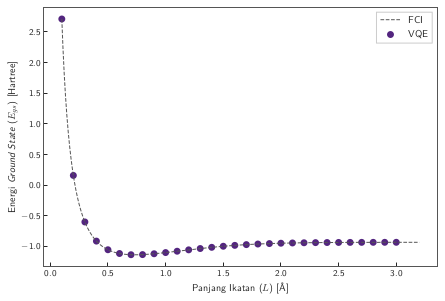

In [8]:
FCI, = plt.plot(FCI_bond_length_wide, FCI_energy_vs_L_wide, color = props['colors']['quantumgray'], ls = '--')
VQE_wide = plt.scatter(VQE_bond_length_wide, VQE_energy_vs_L_wide, color = c_quantum, marker = 'o', alpha=1, linewidths=4)

plt.xlabel('Panjang Ikatan ($L$) [Å]')
plt.ylabel('Energi $\\textit{Ground State}$ ($E_{gs}$) [Hartree]')
plt.legend([FCI, VQE_wide], ['FCI', 'VQE'])
#plt.title('$L = 0.1$ - $3.0$ Å')
plt.tight_layout(pad = 0.1)

plt.savefig('./plots/E_vs_L_wide.pdf')

In [9]:
FCI_energy_vs_L_tight = np.loadtxt('./numerical_results/FCI_energy_tight.txt')
FCI_bond_length_tight = np.loadtxt('./numerical_results/FCI_length_tight.txt')

VQE_energy_vs_L_tight = np.loadtxt('./numerical_results/VQE_energy_vs_L_tight.txt')
VQE_bond_length_tight = np.loadtxt('./numerical_results/VQE_length_tight.txt')

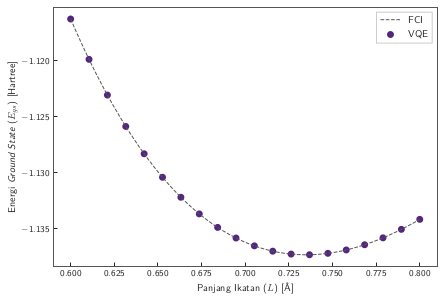

In [10]:
FCI, = plt.plot(FCI_bond_length_tight, FCI_energy_vs_L_tight, color = props['colors']['quantumgray'], ls = '--')
VQE_tight = plt.scatter(VQE_bond_length_tight, VQE_energy_vs_L_tight, color = c_quantum, marker = 'o', alpha=1, linewidths=4)

plt.xlabel('Panjang Ikatan ($L$) [Å]')
plt.ylabel('Energi $\\textit{Ground State}$ ($E_{gs}$) [Hartree]')
plt.legend([FCI, VQE_wide], ['FCI', 'VQE'])
plt.tight_layout(pad = 0.1)
#plt.title('$L = 0.6$ - $0.8$ Å')

plt.savefig('./plots/E_vs_L_tight.pdf')

In [11]:
FCI_energy_vs_L_crammed = np.loadtxt('./numerical_results/FCI_energy_crammed.txt')
FCI_bond_length_crammed = np.loadtxt('./numerical_results/FCI_length_crammed.txt')

VQE_energy_vs_L_crammed = np.loadtxt('./numerical_results/VQE_energy_vs_L_crammed.txt')
VQE_bond_length_crammed = np.loadtxt('./numerical_results/VQE_length_crammed.txt')

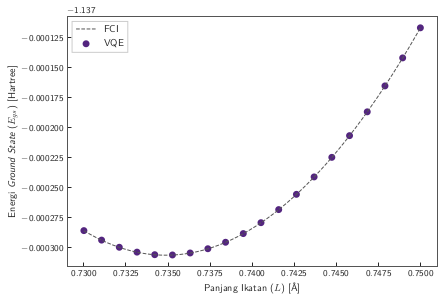

In [12]:
FCI, = plt.plot(FCI_bond_length_crammed, FCI_energy_vs_L_crammed, color = props['colors']['quantumgray'], ls = '--')
VQE_tight = plt.scatter(VQE_bond_length_crammed, VQE_energy_vs_L_crammed, color = c_quantum, marker = 'o', alpha=1, linewidths=4)

plt.xlabel('Panjang Ikatan ($L$) [Å]')
plt.ylabel('Energi $\\textit{Ground State}$ ($E_{gs}$) [Hartree]')
plt.legend([FCI, VQE_wide], ['FCI', 'VQE'])
plt.tight_layout(pad = 0.1)
#plt.title('$L = 0.73$ - $0.75$ Å')
plt.savefig('./plots/E_vs_L_crammed.pdf')

In [13]:
FCI_bond_length_crammed[np.argmin(FCI_energy_vs_L_crammed)]

0.7348649729945989

In [14]:
VQE_bond_length_crammed[np.argmin(VQE_energy_vs_L_crammed)]

0.7352631578947368

In [15]:
VQE_energy_vs_iter = np.loadtxt('./numerical_results/VQE_energy_vs_iteration.txt')
VQE_bond_length_iteration = np.loadtxt('./numerical_results/VQE_length_iteration.txt')


# FCI energy for constant bond length = 0.7414$ Å
FCI_energy_vs_iter = np.linspace(-1.1372701746609022, -1.1372701746609022, 600)

In [16]:
e_new = []
bond_length_new = []

for i in range(len(VQE_energy_vs_iter)):
    if i%10 == 0:
        e_new += [VQE_energy_vs_iter[i]]
        bond_length_new += [i]

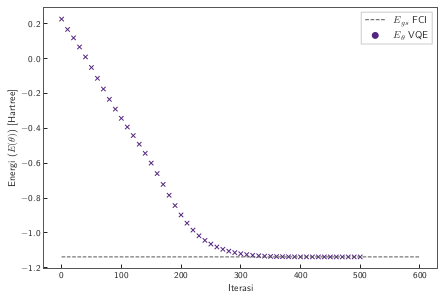

In [17]:
FCI, = plt.plot(FCI_energy_vs_iter, color = props['colors']['quantumgray'], ls = '--')
VQE_tight = plt.scatter(bond_length_new, e_new, color = c_quantum, marker = 'x', alpha=1, s=20)

plt.xlabel('Iterasi')
plt.ylabel('Energi ($E(\\theta)$) [Hartree]')
plt.legend([FCI, VQE_wide], ['$E_{gs}$ FCI', '$E_{\\theta}$ VQE'])
plt.tight_layout(pad = 0.1)
#plt.title('$L = 0.7414$ Å')
plt.savefig('./plots/E_vs_iteration.pdf')

# MAE Calculations

In [18]:
FCI_wide = np.loadtxt('./numerical_results/FCI_energy_wide_30.txt')
FCI_tight = np.loadtxt('./numerical_results/FCI_energy_tight_20.txt')
FCI_crammed = np.loadtxt('./numerical_results/FCI_energy_crammed_20.txt')

In [19]:
total_error = np.sum(abs(FCI_wide - VQE_energy_vs_L_wide)) + np.sum(abs(FCI_tight - VQE_energy_vs_L_tight)) + np.sum(abs(FCI_crammed - VQE_energy_vs_L_crammed))

In [20]:
total_error/(len(FCI_wide) + len(FCI_tight) + len(FCI_crammed))

6.524763142636202e-08

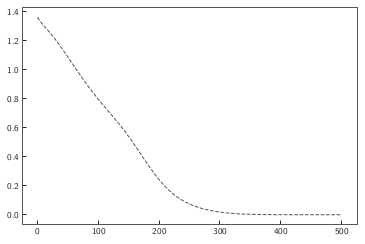

In [21]:
plt.plot(VQE_energy_vs_iter-(-1.1372701746609022), color = props['colors']['quantumgray'], ls = '--')

In [22]:
abs(np.min(VQE_energy_vs_iter) - (-1.1372701746609022))

7.845091665181769e-08